In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/home/ecbm4040/Final_Project/e4040-2021Fall-Project-SCNN-as6430-as6456-vsk2123/src/")

In [2]:
import tensorflow as tf
import numpy as np
#import keras
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, GlobalAveragePooling2D, MaxPooling2D,Softmax
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy


In [3]:
# CIFAR10 Dataset
from modules.utils import load_data
X_train, y_train = load_data(mode='train')
num_training = 49000
num_validation = 1000

X_val = X_train[-num_validation:, :]
y_val = y_train[-num_validation:]

X_train = X_train[:num_training, :]
y_train = y_train[:num_training]

# Preprocessing: subtract the mean value across every dimension for training data, and reshape it to be RGB size
mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image

X_train = X_train.reshape(-1,3,32,32).transpose(0,2,3,1) / 255
X_val = X_val.reshape(-1,3,32,32).transpose(0,2,3,1) / 255

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

y_train_dummy = tf.keras.utils.to_categorical(y_train)
y_val_dummy = tf.keras.utils.to_categorical(y_val)
print('Train labels shape (one-hot): ', y_train_dummy.shape)
print('Validation labels shape (one-hot): ', y_val_dummy.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Train labels shape (one-hot):  (49000, 10)
Validation labels shape (one-hot):  (1000, 10)


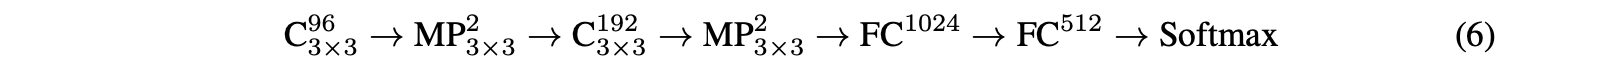

In [4]:
from modules.layers import spectralConv2D


def spectralCNN(input_shape):

    model = Sequential()

    model.add(spectralConv2D(96, kernel_size=(3,3),padding="VALID", strides=(1,1), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    model.add(spectralConv2D(192, kernel_size=(3,3),padding="VALID", strides=(1,1)))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(1024,activation="relu"))
    model.add(Dense(512,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    return model
    


In [5]:
spectral_cnn_model = spectralCNN(X_train.shape[1:])

spectral_cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history=spectral_cnn_model.fit(x=X_train, y=y_train,
          batch_size=128,
          epochs=25, 
          validation_data=(X_val, y_val)
              )

Epoch 1/25
383/383 [==============================] - 48s 14ms/step - loss: 1.5964 - accuracy: 0.4111 - val_loss: 1.0333 - val_accuracy: 0.6410
Epoch 2/25
383/383 [==============================] - 5s 13ms/step - loss: 0.9456 - accuracy: 0.6677 - val_loss: 0.8583 - val_accuracy: 0.7060
Epoch 3/25
383/383 [==============================] - 5s 13ms/step - loss: 0.7154 - accuracy: 0.7503 - val_loss: 0.7700 - val_accuracy: 0.7460
Epoch 4/25
383/383 [==============================] - 5s 13ms/step - loss: 0.5541 - accuracy: 0.8075 - val_loss: 0.7476 - val_accuracy: 0.7680
Epoch 5/25
383/383 [==============================] - 5s 13ms/step - loss: 0.4234 - accuracy: 0.8527 - val_loss: 0.6644 - val_accuracy: 0.7820
Epoch 6/25
383/383 [==============================] - 5s 13ms/step - loss: 0.2987 - accuracy: 0.8974 - val_loss: 0.7299 - val_accuracy: 0.7750
Epoch 7/25
383/383 [==============================] - 5s 13ms/step - loss: 0.1917 - accuracy: 0.9360 - val_loss: 0.8107 - val_accuracy: 0.784

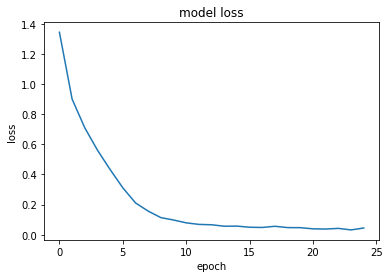

In [7]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()